In [77]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.datasets import make_moons
import plotly.graph_objs as go

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
iris = pd.read_csv("/content/Iris Flower - Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris = iris.drop(columns = ["Id"])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
iris.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [24]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Histogram**

<Axes: >

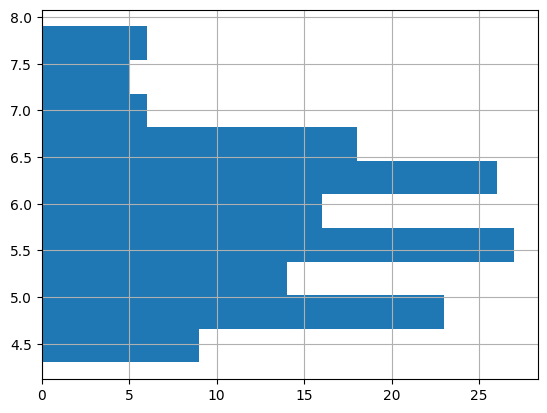

In [87]:
iris['SepalLengthCm'].hist(orientation='horizontal')

<Axes: >

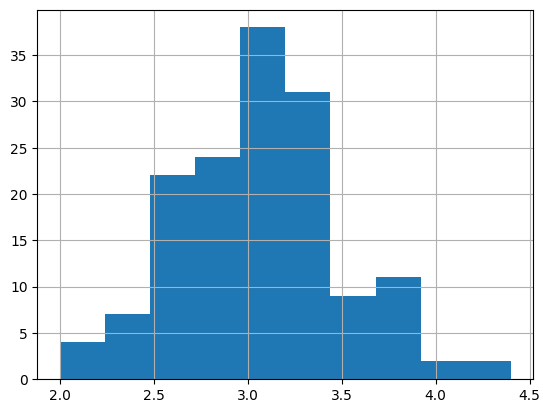

In [27]:
iris['SepalWidthCm'].hist()

<Axes: >

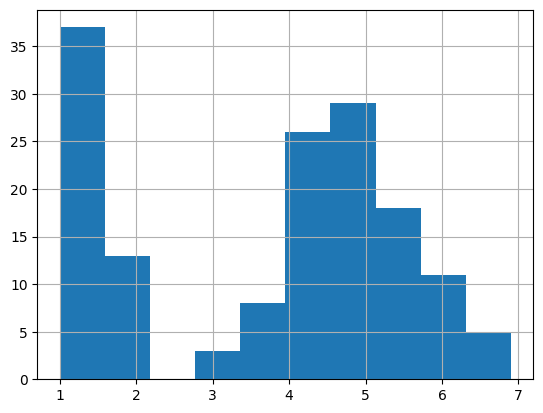

In [28]:
iris['PetalLengthCm'].hist()

<Axes: >

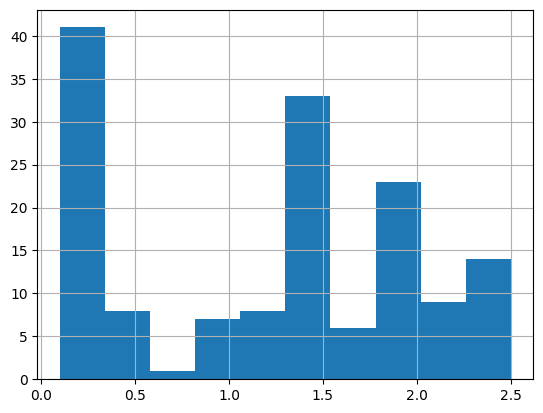

In [30]:
iris['PetalWidthCm'].hist()

**Scatterplot**

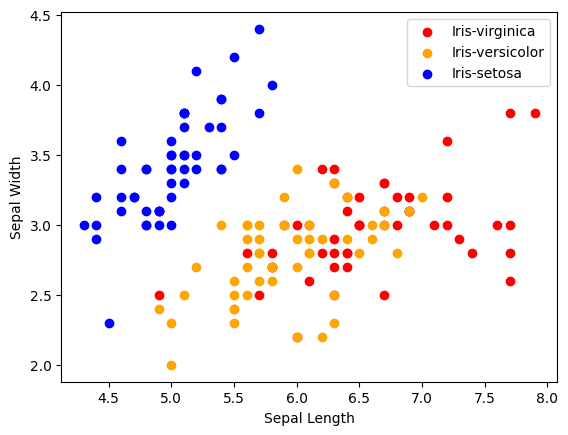

In [32]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = iris[irism['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

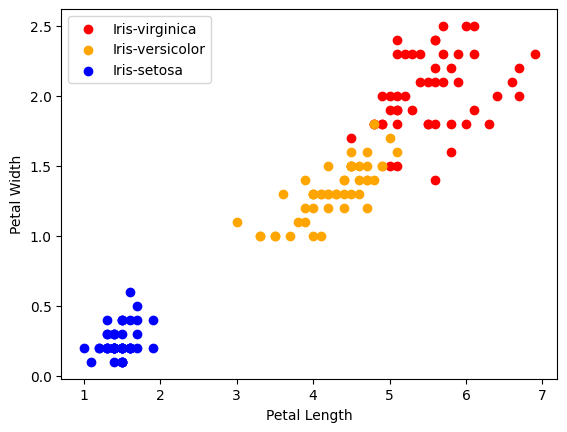

In [34]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

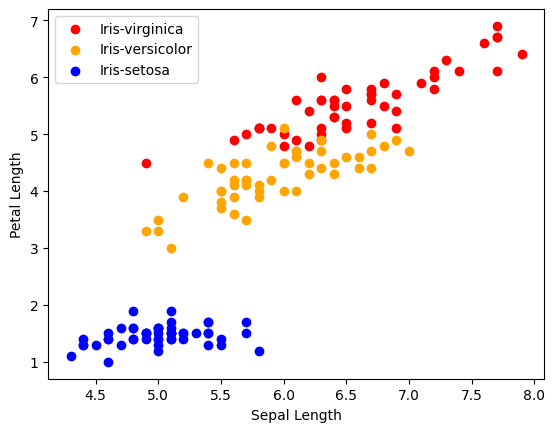

In [35]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

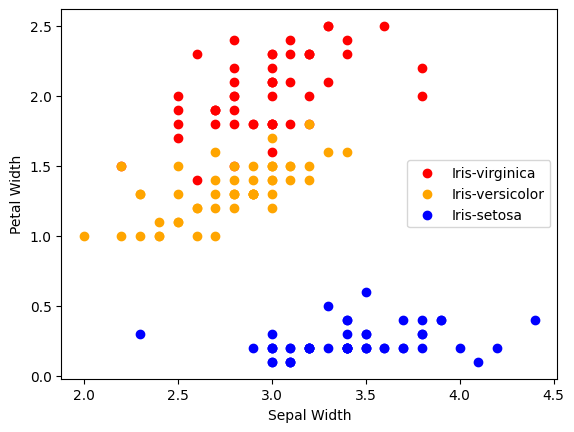

In [36]:
for i in range(3):
    x = iris[iris['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [38]:
iris.corr()

<ipython-input-38-156dd03bc859>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-40-74bdc72cd29a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris.corr()


<Axes: >

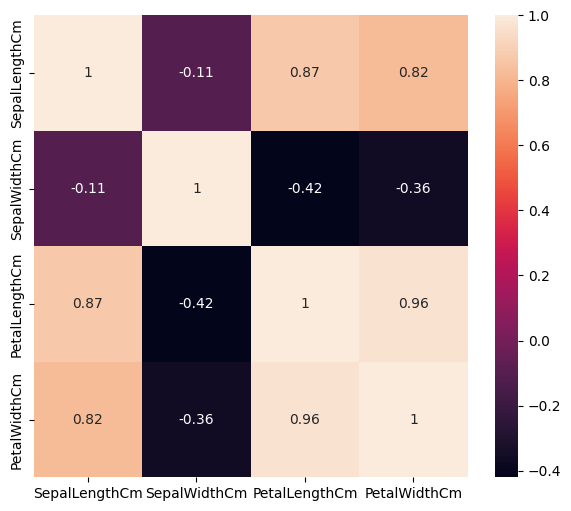

In [40]:
corr = iris.corr()
fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(corr, annot=True, ax=ax)

In [45]:
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Model Traning**

In [59]:
#train data = 80%
#test data = 20%
X = iris.drop(columns=['Species'])
Y = iris['Species']
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, test_size=0.2)

Logistic Regression

In [60]:
# Logistic Regrssion
model = LogisticRegression()

In [62]:
#model training
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
#Logistic regression model accuracy
print('Model Accuracy on training data: ', model.score(X_train,Y_train)*100)

Model Accuracy on training data:  97.5


In [64]:
print('Model Accuracy on test data: ', model.score(X_test,Y_test)*100)

Model Accuracy on test data:  96.66666666666667


K Nearest Neighbors

In [73]:
# KNN model
model = KNeighborsClassifier()

In [74]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [83]:
#KNN model accuracy
print('Model Accuracy on training data: ', model.score(X_train,Y_train)*100)
print('Model Accuracy on test data: ', model.score(X_test,Y_test)*100)

Model Accuracy on training data:  96.66666666666667
Model Accuracy on test data:  96.66666666666667


Decision Tree

In [84]:
#decision tree
model = DecisionTreeClassifier()

In [85]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [86]:
#Decision tree accurcy
print('Model Accuracy on training data: ', model.score(X_train,Y_train)*100)
print('Model Accuracy on test data: ', model.score(X_test,Y_test)*100)

Model Accuracy on training data:  100.0
Model Accuracy on test data:  96.66666666666667


I used the three models for the Iris Flower Classification is the Logistic Regression, KNN classification, Decision Tree classification.

I conclude that all these three model is giving same accuracy(96.666667) on the test data.
But for the training data the model are giving the different accuracy levels.